<a href="https://colab.research.google.com/github/datascience-vivek/Capstone-Project-on-Demand-Prediction-for-Public-Transport/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [89]:
#Mount Google drive to fetch Dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#importing necessary libraries
import numpy as np
import pandas as pd
#libraries for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns



In [91]:
#store dataset as df
df = pd.read_csv("/content/drive/MyDrive/Datasets/train_revised.csv")

#Overview Of  Our DataSet.

In [92]:
#Rows and columns count
df.shape

(51645, 10)

In [93]:
#Top 5 and Bottom 5 Rows
display(df.head(),  df.tail())

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [94]:
#Basic information from features
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [95]:
#Function for detail information about data frame.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
#Insert columns in place of index  
  info = pd.DataFrame(index=DataFrame.columns)
#Inser Data type of columns as dtype into  Dataframe in first place   
  info['dtype'] = DataFrame.dtypes
#Inser Unique elements in each columns into  Dataframe at second place    
  info['Unique'] = DataFrame.nunique()
#Inser NUll elements in each columns into  Dataframe at third place  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
#Inser Not NUll elements in each columns into  Dataframe at fourth place  
  info['Num_nonNullValues'] = DataFrame.count()
  return info

In [96]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
ride_id,int64,6249,0,51645
seat_number,object,61,0,51645
payment_method,object,2,0,51645
payment_receipt,object,51645,0,51645
travel_date,object,149,0,51645
travel_time,object,78,0,51645
travel_from,object,17,0,51645
travel_to,object,1,0,51645
car_type,object,2,0,51645
max_capacity,int64,2,0,51645


**Observation**
* There are no nulls in our data set.
* Most of the feature are object type.
* Continuous features are very less.
* Target variable is not provided we have to Extract it from the given features.

#Generating Target Variable & Feature Selection as per Problem Statement.

**Problem Statement**

We have to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride.
* i.e. for a specific route on a specific date and time.
* We have to predict the total tickets to be booked for a journey from different 17 location toward Nirobi on specific day and during specific period of time.

**Feature Description:**
* ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* seat_number: seat assigned to ticket
* payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* payment_receipt: unique id number for ticket purchased from Mobiticket
* travel_date: date of ride departure. (MM/DD/YYYY)
* travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* travel_from: town from which ride originated
* travel_to: destination of ride. All rides are to Nairobi.
* car_type: vehicle type (shuttle or bus)
* max_capacity: number of seats on the vehicle

**Note**
* Using above feature we have to Extract Traget variable "No. of Tickets"or "Bookings".
* we have to check which of the above features are relevant for our Target variable to predict.
* keep the Relevant features and discard others. 
 

**Extracting Target Variable**
* As the we have unique vehicle ids for routes we will count the total unique ride_id's which is Total Bookings of a particular day at particular route and specific time.

In [97]:
#Count the id,s and map them with given id number.
ride_id_dict = {} 
for ride_id in df["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [98]:
#length of dictionary and length of ride_id unique should be same
display(len(ride_id_dict),len(df.ride_id.unique()))

6249

6249

In [99]:
#drop all the duplicates
df.drop_duplicates(subset="ride_id",inplace=True)
df.reset_index(drop= True, inplace=True)

In [100]:
#store the dictionary as per the ride_id
for i in range(len(df)):
    ride_id = df.loc[i]["ride_id"]
    df.at[i,"Bookings"] = ride_id_dict[ride_id]

**Note**
* we have Choosen this approch of Extracting "Bookings" or "no. of tickets" after trying gropby over ride_id count seat_number. there we got a flaw due to paymnet method which waste our 42 values waste.
* we also check if there is repeat ride_id for different travel_date and found we have unique ride_ids for each day.

In [101]:

df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Bookings
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


#Basic Feature Selection


**Uniue Value Features**

In [102]:
#check unique counts of features
print(f"Total values counts of ride_id:-{len(df.ride_id.unique())}")
print(f"Total values counts of payment_receipt:-{len(df.payment_receipt.unique())}")


Total values counts of ride_id:-6249
Total values counts of payment_receipt:-6249


**Constant Value & Imbalance Feature**

In [103]:
#check value count
print(df.payment_method.value_counts())
print("\n")
print(df.travel_to.value_counts())

Mpesa    6211
Cash       38
Name: payment_method, dtype: int64


Nairobi    6249
Name: travel_to, dtype: int64


**Multicollinear Features**

In [104]:
#one_hot encoding
Dummy=pd.get_dummies(df["car_type"])

In [105]:
#concate
check=pd.concat([Dummy,df[["max_capacity","Bookings"]]],axis=1)

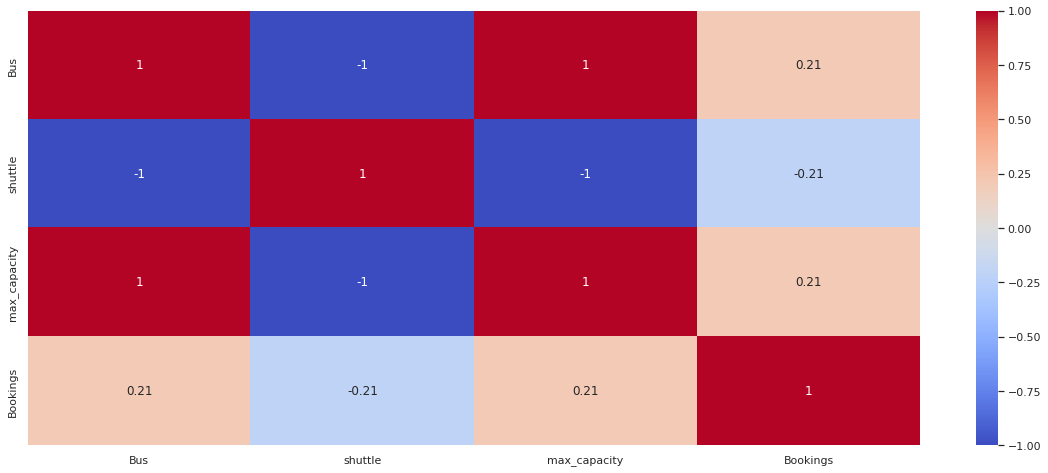

In [106]:
#Heat map to check correlation
sns.heatmap(check.corr(),cmap='coolwarm',annot=True)
plt.show()

In [107]:
#Drop features from above observation
df.drop(df[["travel_to","ride_id","payment_receipt","car_type","seat_number","payment_method"]],axis=1,inplace=True)

**Conclusion**
* We Drop all those Features which has all the values unique like payment_receipt and ride_id(as we extracted counts of ride_id).
* We Drop the feature travel_to as it has constant value  that is Nairobi.
* We Drop payment_method as this feature is imbalance.
* car_type nad max_capacity both are multicollinear which we validated with heat map.
* From the problem statement point of view seat no. is not an important feature in determining Bookings.so we drop that too.

#Feature Engineering

In [108]:
#Check if Bookings more than maximum seat.
More_Bookings_less_seat=df[df['max_capacity']<df['Bookings']].index
display(df[df['max_capacity']<df['Bookings']], More_Bookings_less_seat,len(More_Bookings_less_seat))

,travel_date,travel_time,travel_from,max_capacity,Bookings
1669,13-02-18,7:00,Kisii,11,12.0
1924,09-01-18,7:00,Sirare,49,50.0
1978,07-02-18,9:30,Kisii,11,12.0
2067,05-02-18,10:30,Kisii,11,12.0
2076,05-02-18,9:10,Kisii,11,12.0
2166,04-02-18,10:51,Kisii,11,12.0
2342,31-01-18,9:50,Kisii,11,12.0
3642,20-12-17,10:00,Kisii,11,12.0
3775,19-12-17,7:20,Kisii,11,12.0
4134,14-12-17,10:57,Kisii,11,12.0


Int64Index([1669, 1924, 1978, 2067, 2076, 2166, 2342, 3642, 3775, 4134, 4425,
            4670, 5020],
           dtype='int64')

13

In [109]:
#drop abnormal Bookings
df.drop(index=More_Bookings_less_seat,inplace=True)

**Observation**
* we have 13 Bookings which are more than available seats hence we will drop them.

In [110]:

display(df.head(5),df.tail(5))

,travel_date,travel_time,travel_from,max_capacity,Bookings
0,17-10-17,7:15,Migori,49,1.0
1,19-11-17,7:12,Migori,49,1.0
2,26-11-17,7:05,Keroka,49,1.0
3,27-11-17,7:10,Homa Bay,49,5.0
4,27-11-17,7:12,Migori,49,31.0


,travel_date,travel_time,travel_from,max_capacity,Bookings
6244,20-04-18,23:10,Ndhiwa,49,11.0
6245,20-04-18,7:05,Ndhiwa,49,11.0
6246,20-04-18,7:09,Rongo,49,1.0
6247,20-04-18,8:00,Awendo,49,1.0
6248,14-11-17,5:10,Kisii,49,1.0


**Travel_date**
* **Extracting years ,month ,days ,weeks,day_ofweek from travel_date**
* **Extracting hours from travel_time**

In [111]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#Extracting features from Date
df['year'] = pd.DatetimeIndex(df['travel_date']).year
df['month'] = pd.DatetimeIndex(df['travel_date']).month
df["day_ofweek"] = pd.DatetimeIndex(df["travel_date"]).dayofweek
df.drop(["travel_date"],axis=1,inplace=True)

In [112]:
#express travel time in minutes
df["Time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df.drop(["travel_time"],axis=1,inplace=True)


In [113]:
#Convert minutes into hours with ceil value
def calculate_time_period(travel_time_In_minutes):
    time_period = (travel_time_In_minutes / 60)
    
    return time_period

df['Boarding_time'] = df.Time.apply(calculate_time_period)
df.drop(["Time"],axis=1,inplace=True)

In [114]:
df.head()

,travel_from,max_capacity,Bookings,year,month,day_ofweek,Boarding_time
0,Migori,49,1.0,2017,10,1,7.250000
1,Migori,49,1.0,2017,11,6,7.200000
2,Keroka,49,1.0,2017,11,6,7.083333
3,Homa Bay,49,5.0,2017,11,0,7.166667
4,Migori,49,31.0,2017,11,0,7.200000


In [115]:
#Segregate hours into 4 periods of day.
bins = [0, 6, 12, 18,23]
names = ['Mid_night','Day','Aftrenoon','Night']
df['Boarding_period'] = pd.cut(df.Boarding_time, bins, labels=names)
df.drop(["Boarding_time"],axis=1,inplace=True)

In [116]:
print(df.shape)
df.sample(5)

(6236, 7)


,travel_from,max_capacity,Bookings,year,month,day_ofweek,Boarding_period
4596,Kisii,11,11.0,2017,8,5,Day
1145,Homa Bay,49,20.0,2017,12,4,Day
259,Kisii,11,1.0,2018,3,6,Mid_night
3784,Kisii,11,5.0,2017,12,0,Day
594,Rongo,49,2.0,2017,7,2,Day


**Observation**
* Our final dataset has all the independent features as categorical type.
* we will deal with them using some categorical encoding technique.

**Time of Travel**
* converting time into minutes formate.
* Drop "travel_time" after conversion.

**Note**
* It will be better to segregate the time into different Periods of day.

# Outliers

**Target Variable**

In [117]:
df[df["Bookings"]>=49]

,travel_from,max_capacity,Bookings,year,month,day_ofweek,Boarding_period
1640,Migori,49,49.0,2017,12,2,Day
3762,Sirare,49,49.0,2018,2,0,Night
4221,Kisii,49,49.0,2017,12,2,Day
5757,Sirare,49,49.0,2018,9,1,Night


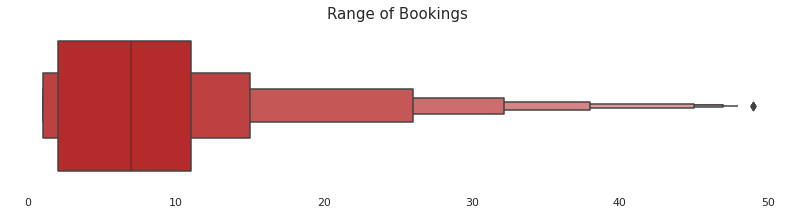

In [118]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df['Bookings'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Bookings',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [119]:
def out_iqr(df , column):
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    perc=(df1.shape[0]+ df2.shape[0]/len(df[column]))
    return print('Total number of outliers are',df1.shape[0]+ df2.shape[0],"In percentage",((df1.shape[0]+ df2.shape[0])*100/len(df[column])))
          

In [120]:
out_iqr(df,"Bookings")

The IQR is 9.0
The lower bound value is -11.5
The upper bound value is 24.5
Total number of outliers are 419 In percentage 6.71905067350866


In [121]:
df["Bookings"].skew()

2.052378171358655

In [122]:
df['Bookings']=df["Bookings"].astype(int)

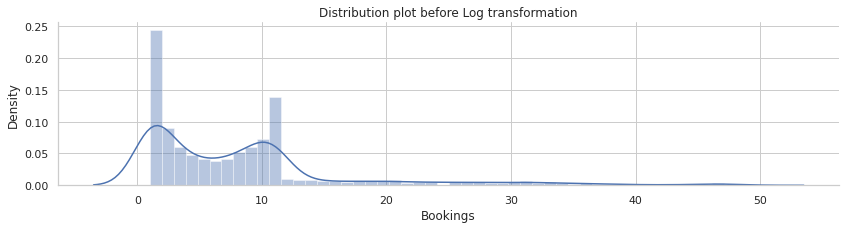

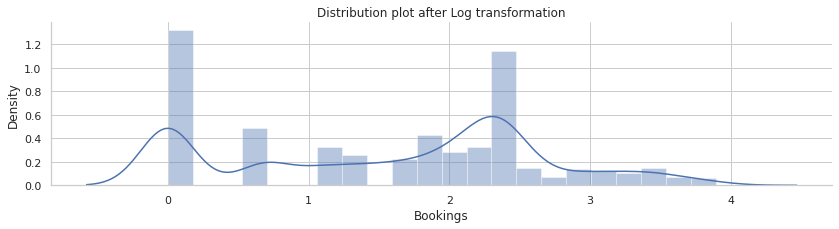

In [123]:
#log trnsformation
sns.distplot(df['Bookings'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
# df1['log_Bookings'] = np.log(df['Bookings'])
sns.distplot(np.log(df['Bookings']))
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

****

In [124]:
#cap the Outliers
df["Bookings"] = np.where(df["Bookings"] >40, 40,df['Bookings'])
df.Bookings.skew()

1.8658061487623405

#EDA

**Countplot for categorical features.**

travel_from


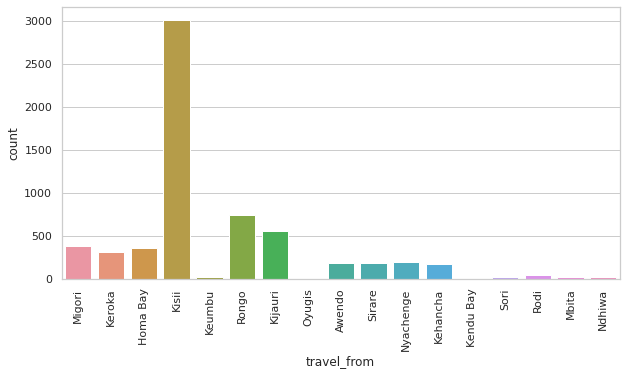

max_capacity


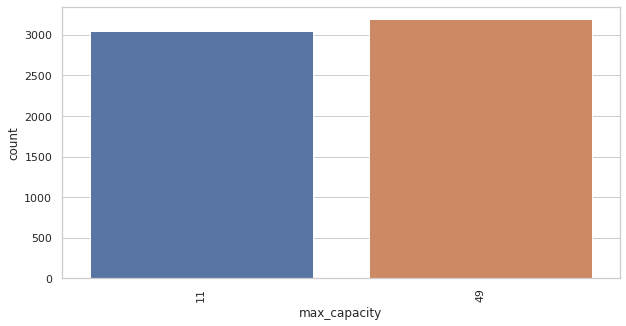

year


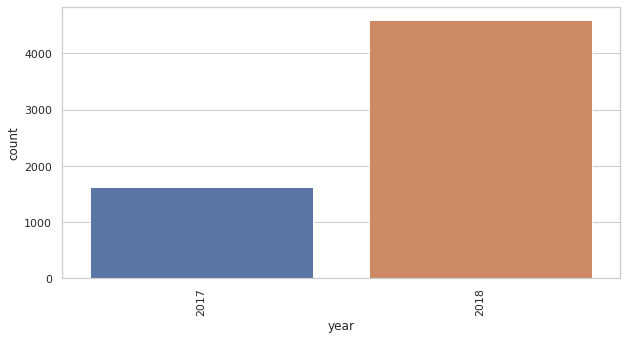

month


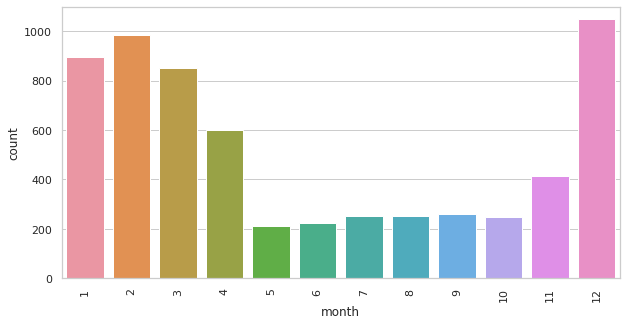

day_ofweek


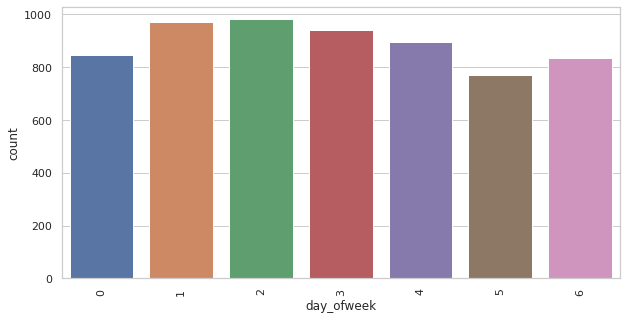

Boarding_period


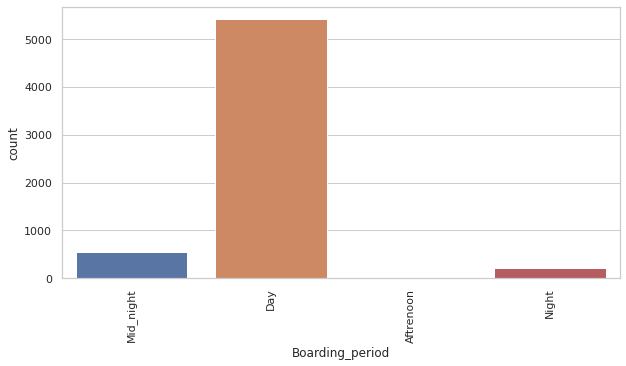

In [125]:

  
for i in df[["travel_from",	"max_capacity",	"year", "month","day_ofweek",	"Boarding_period"]]:
  print(i)
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.countplot(data=df,x=i,ax=ax)
  
  plt.xticks(rotation=90)
  plt.show()

**travel_from**

**Observatio**
* In the dataset Majority of Travelling is between Kissi and Nairibi.also the distribution is imbalance.
* Vehicle type feature looks balance.
* We have more data from the year 2018 than 2017.Imbalance feature.
* The month of jan,feb,march,apr abd december has maximum travellings.need to treat this problem by labelling these month on the basis of distribution.
* There is no pattern in day_ofweek it looks equally distributed(balanced).
* Majority of travelling happens during Day(Imbalance).


**Features Relation With Target variable**

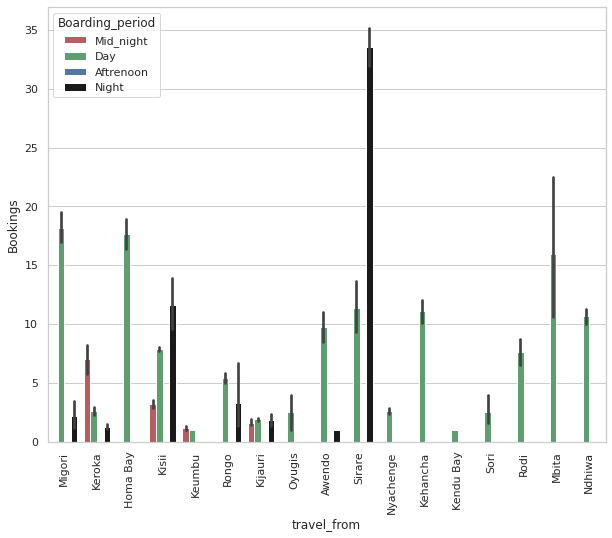

In [126]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,8)},style='whitegrid')
sns.barplot(x = 'travel_from',y = 'Bookings',hue="Boarding_period",data = df,palette=["r", "g", "b", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

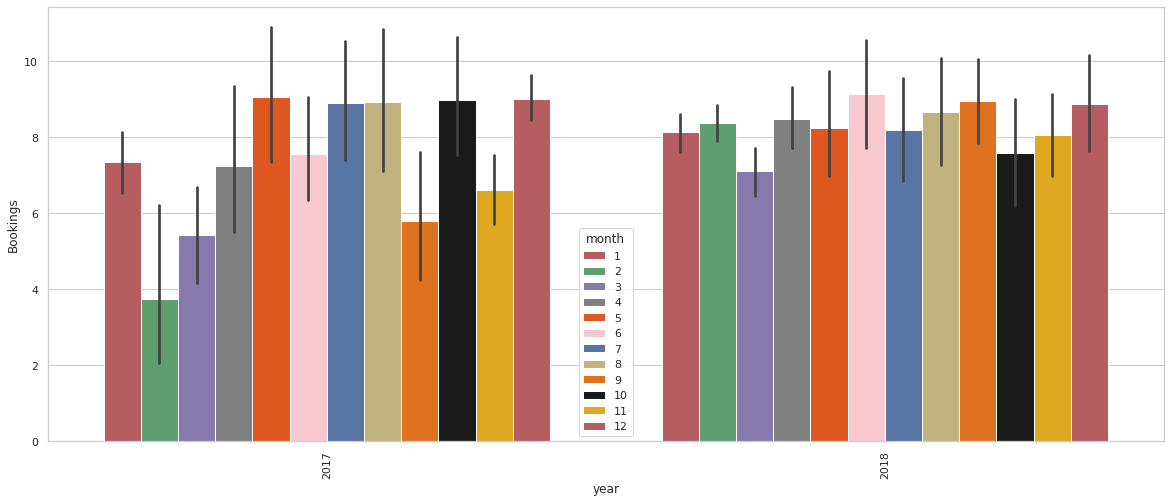

In [127]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'year',y = 'Bookings',hue="month",data = df,palette=["r","g","m","grey","C1","pink","b","y", "C2", "k","C10"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

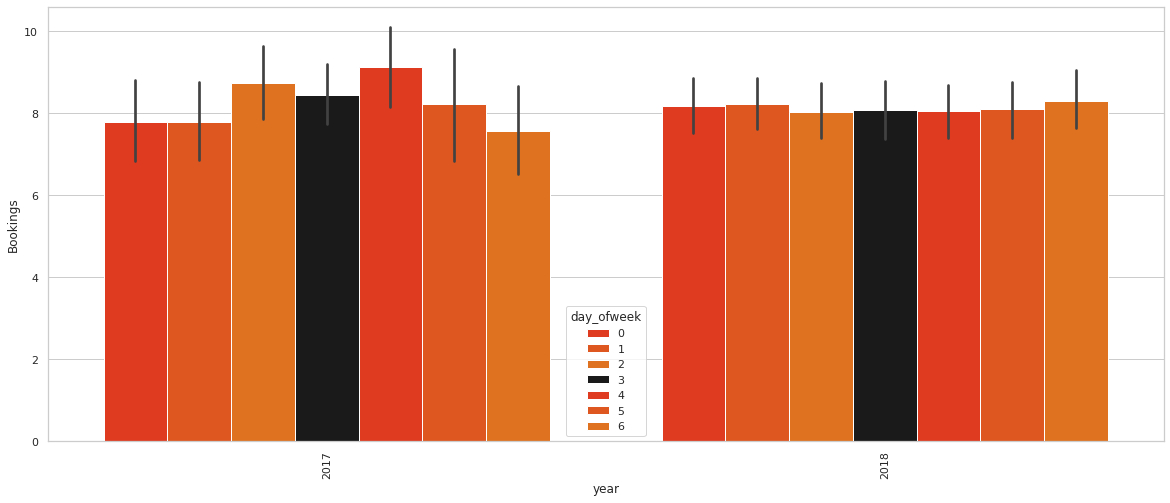

In [128]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'year',y = 'Bookings',hue="day_ofweek",data = df,palette=["C0", "C1", "C2", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

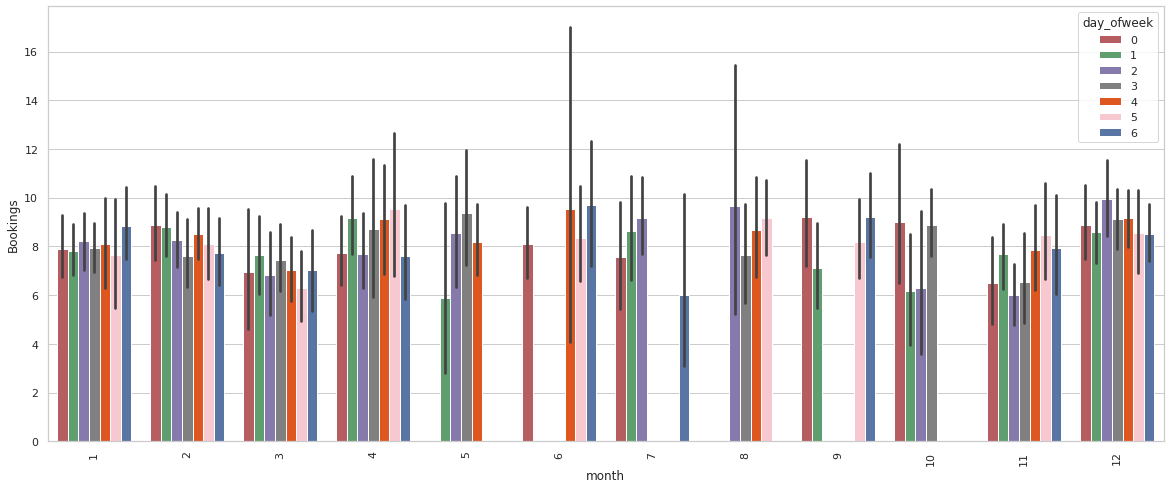

In [129]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'month',y = 'Bookings',hue="day_ofweek",data = df,palette=["r","g","m","grey","C1","pink","b","y", "C2", "k","C10"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**observatio:-**
* Major travelling happend during Afternoon and Evening. 

**Observation**
* although we have less data for year 2017. still the travlling patter show approx same for both which shows there were more rides during 2017.
* there is no such pattern which indicate trend of travelling during weekends or during weekdays. 

**Observation**
* Higher Travelling patter during December can back by festivals(christmas).
* There is no such favorite vehicle type for ride.

In [130]:
df.head()

,travel_from,max_capacity,Bookings,year,month,day_ofweek,Boarding_period
0,Migori,49,1,2017,10,1,Day
1,Migori,49,1,2017,11,6,Day
2,Keroka,49,1,2017,11,6,Day
3,Homa Bay,49,5,2017,11,0,Day
4,Migori,49,31,2017,11,0,Day


**Data set Distribution**

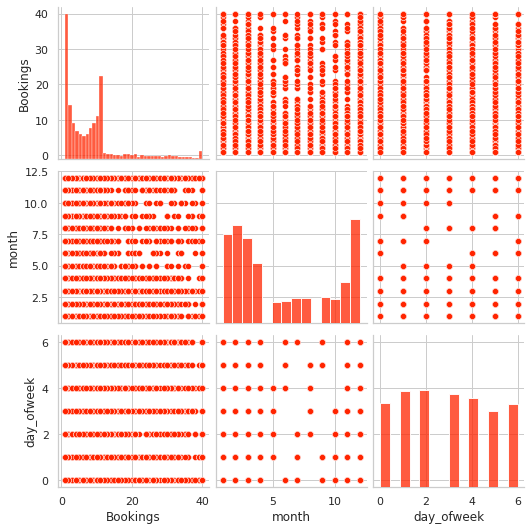

In [131]:

# visualize the relationship between the features and the response using scatterplots
Plot=df[["Bookings","Boarding_period",'travel_from', 'month','day_ofweek']]
sns.pairplot(Plot)
plt.show()

**Observation**
* we can clearly see this dataset has low linear relation.


#Feature Transform and Selection
We will use three methods for feature selection:

* Remove collinear features
* Remove features with greater than a threshold percentage of missing values
* Keep only the most relevant features using feature importances from a model


In [132]:
df.month.value_counts()

12    1047
2      984
1      895
3      852
4      599
11     414
9      261
7      252
8      251
10     246
6      225
5      210
Name: month, dtype: int64

In [133]:
imp_month_dict = {12:1,2:1,1:1,3:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
df['month'].replace(imp_month_dict,inplace=True)
df['month'].value_counts()

1    3778
3    1445
2    1013
Name: month, dtype: int64

**Labelling max_capacity**

In [134]:
df.max_capacity.value_counts()

49    3188
11    3048
Name: max_capacity, dtype: int64

In [135]:
fil1 = df['max_capacity'] == 49
fil2= df["max_capacity"]==11
df.loc[fil1, 'max_capacity'] = 1
df.loc[fil2,'max_capacity']=2
df['max_capacity'].value_counts()

1    3188
2    3048
Name: max_capacity, dtype: int64

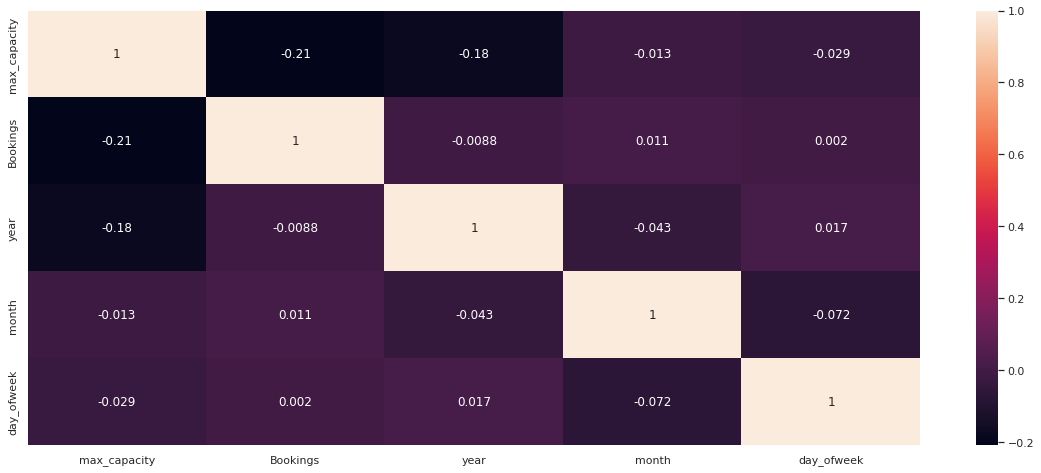

In [136]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [137]:
df.drop(["year"],axis=1,inplace=True)

In [138]:
df.head()

,travel_from,max_capacity,Bookings,month,day_ofweek,Boarding_period
0,Migori,1,1,3,1,Day
1,Migori,1,1,2,6,Day
2,Keroka,1,1,2,6,Day
3,Homa Bay,1,5,2,0,Day
4,Migori,1,31,2,0,Day


**One Hot Encoding and Feature selection using Random Forest**

In [139]:
one_hot = pd.get_dummies(df[["travel_from","Boarding_period"]])
one_hot=pd.DataFrame(one_hot)
one_hot

,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,...,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,Boarding_period_Mid_night,Boarding_period_Day,Boarding_period_Aftrenoon,Boarding_period_Night
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6247,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [140]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(one_hot.columns)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(one_hot, df["Bookings"])
# inverse_log=np.expm1(y_test)

RandomForestClassifier()

In [141]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

In [142]:
importances

array([0.01111723, 0.03305564, 0.01993647, 0.00115645, 0.07541217,
       0.01337729, 0.17312502, 0.20641126, 0.00881385, 0.03498339,
       0.01616891, 0.03330707, 0.00212902, 0.01378256, 0.04664259,
       0.05252454, 0.00688798, 0.11148932, 0.1018144 , 0.        ,
       0.03786485])

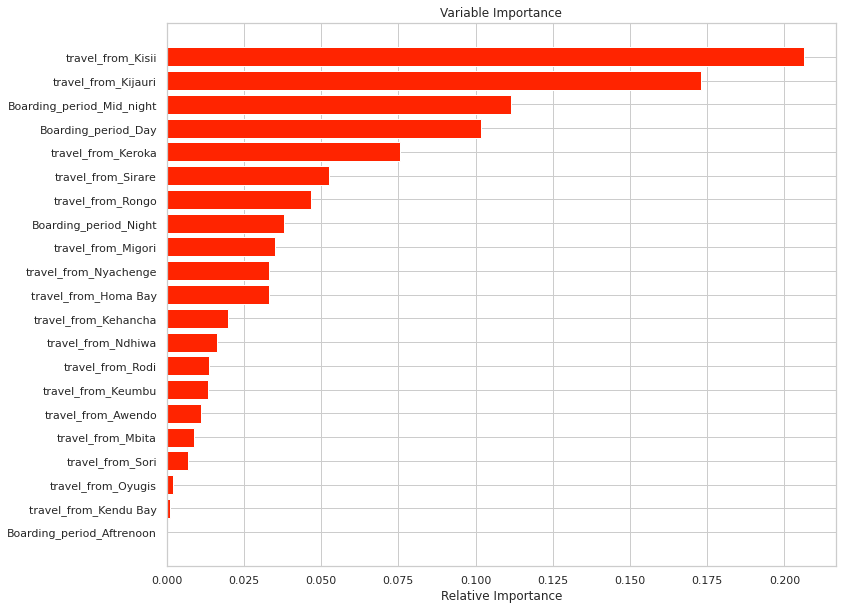

In [143]:
plt.figure(figsize=(12, 10))
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

**Top 11 features**

In [144]:
one_hot_imp=one_hot.copy()
one_hot_imp=one_hot[['travel_from_Homa Bay','travel_from_Keroka', 'travel_from_Kijauri','travel_from_Kisii', 'travel_from_Migori',
        'travel_from_Nyachenge','travel_from_Rongo', 'travel_from_Sirare',
        'Boarding_period_Mid_night', 'Boarding_period_Day','Boarding_period_Night']]
one_hot_imp.head()        

,travel_from_Homa Bay,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Migori,travel_from_Nyachenge,travel_from_Rongo,travel_from_Sirare,Boarding_period_Mid_night,Boarding_period_Day,Boarding_period_Night
0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,1,0


In [145]:
df.head()

,travel_from,max_capacity,Bookings,month,day_ofweek,Boarding_period
0,Migori,1,1,3,1,Day
1,Migori,1,1,2,6,Day
2,Keroka,1,1,2,6,Day
3,Homa Bay,1,5,2,0,Day
4,Migori,1,31,2,0,Day


In [146]:
Processed_df = pd.concat([df[["Bookings","max_capacity","month","day_ofweek"]], one_hot_imp], axis=1)
Processed_df

,Bookings,max_capacity,month,day_ofweek,travel_from_Homa Bay,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Migori,travel_from_Nyachenge,travel_from_Rongo,travel_from_Sirare,Boarding_period_Mid_night,Boarding_period_Day,Boarding_period_Night
0,1,1,3,1,0,0,0,0,1,0,0,0,0,1,0
1,1,1,2,6,0,0,0,0,1,0,0,0,0,1,0
2,1,1,2,6,0,1,0,0,0,0,0,0,0,1,0
3,5,1,2,0,1,0,0,0,0,0,0,0,0,1,0
4,31,1,2,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,11,1,2,4,0,0,0,0,0,0,0,0,0,0,0
6245,11,1,2,4,0,0,0,0,0,0,0,0,0,1,0
6246,1,1,2,4,0,0,0,0,0,0,1,0,0,1,0
6247,1,1,2,4,0,0,0,0,0,0,0,0,0,1,0


**Observation**
* we have selected only important features which we extarcted.

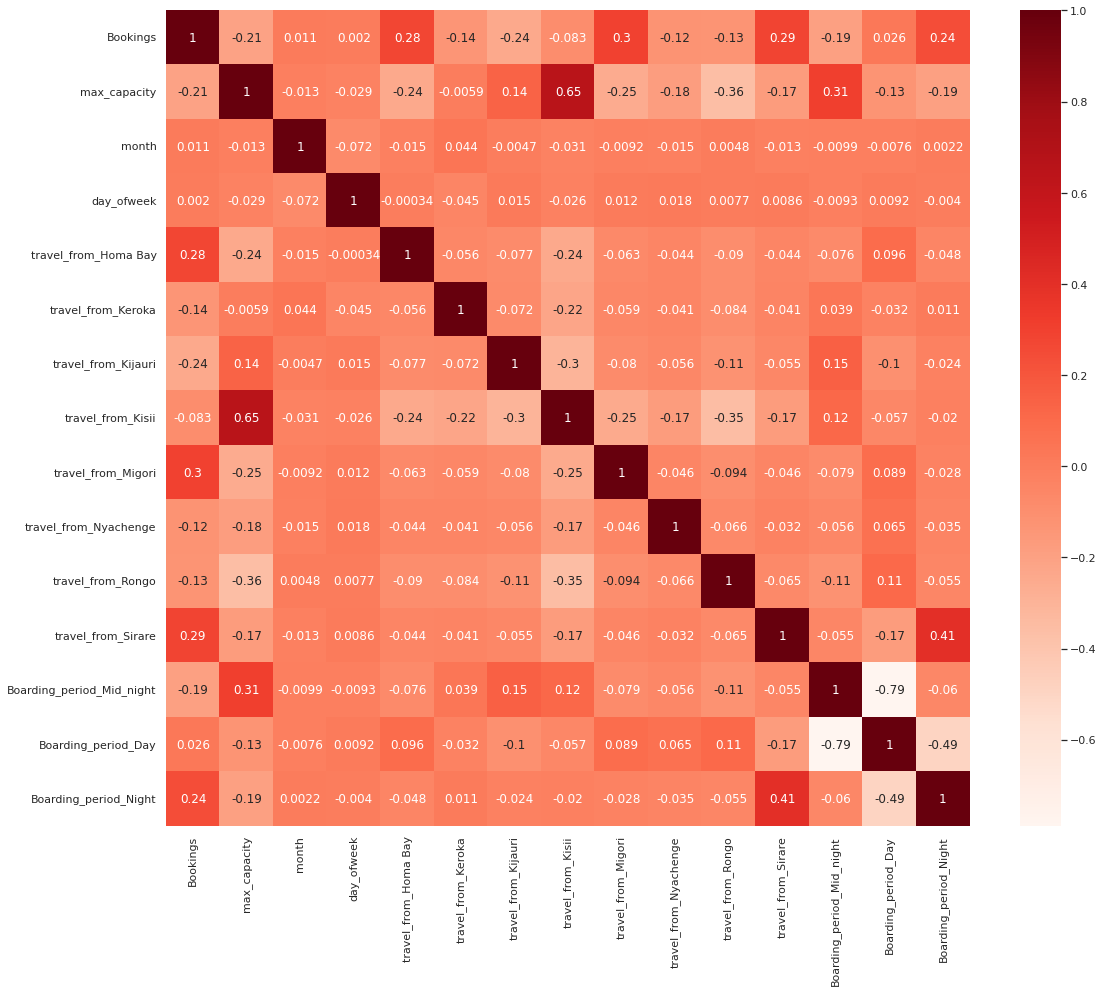

In [147]:
#Using Pearson Correlation
plt.figure(figsize=(18,15))
cor =Processed_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Observatio**
* we have no multicollinearity in the final dataset.

#Train Test Split

In [148]:
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
y = Processed_df['Bookings']
X = Processed_df.drop(['Bookings'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [149]:
X_train.columns

Index(['max_capacity', 'month', 'day_ofweek', 'travel_from_Homa Bay',
       'travel_from_Keroka', 'travel_from_Kijauri', 'travel_from_Kisii',
       'travel_from_Migori', 'travel_from_Nyachenge', 'travel_from_Rongo',
       'travel_from_Sirare', 'Boarding_period_Mid_night',
       'Boarding_period_Day', 'Boarding_period_Night'],
      dtype='object')

In [150]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [151]:

X_train.shape, X_test.shape


((4988, 14), (1248, 14))


#Ml Models

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [153]:
from sklearn import metrics

#Evaluate matrices
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
# def evaluate(true, predicted):
#     mae = metrics.mean_absolute_error(true, predicted)
#     mse = metrics.mean_squared_error(true, predicted)
#     rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
#     r2_square = metrics.r2_score(true, predicted)
#     return mae, mse, rmse, r2_square


In [154]:

import statsmodels.api as sm
LR_model = LinearRegression(normalize=True)
LR_model.fit(X_train,y_train)
print(LR_model.coef_,"\n","Intercept/offset",LR_model.intercept_)
#fit OLS model
lm_sm=sm.OLS(y_train,X_train).fit()

[ 1.07291473  0.28209233 -0.15201032  7.80878983 -7.035733   -8.07723998
 -3.06750455  7.73030817 -7.07788198 -4.37072455  8.32596669 -2.66200452
  0.45193656  8.1581199 ] 
 Intercept/offset 9.279677633390044


In [155]:
test_pred = LR_model.predict(X_test)
train_pred = LR_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-LR_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("\n____________________________________________")
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-LR_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Test set evaluation:
_____________________________________
MAE: 4.55240746123063
MSE: 42.32159965585198
RMSE: 6.5055053343957825
R2 Square 0.40418388647205994
__________________________________
Adjusted R2:- 0.39741874000864463

____________________________________________
Train set evaluation:
_____________________________________
MAE: 4.67564275576039
MSE: 43.96672241385835
RMSE: 6.630740713816093
R2 Square 0.3666042162642199
__________________________________
Adjusted R2:- 0.3648210791292308


**Reverse Log Transform the Predictions:**


In [156]:
# inverse_log=np.expm1(y_test)
# inverse_log_pred = np.expm1(test_pred)

In [157]:
# invese_log_pred

Text(0.5, 0, 'Index')

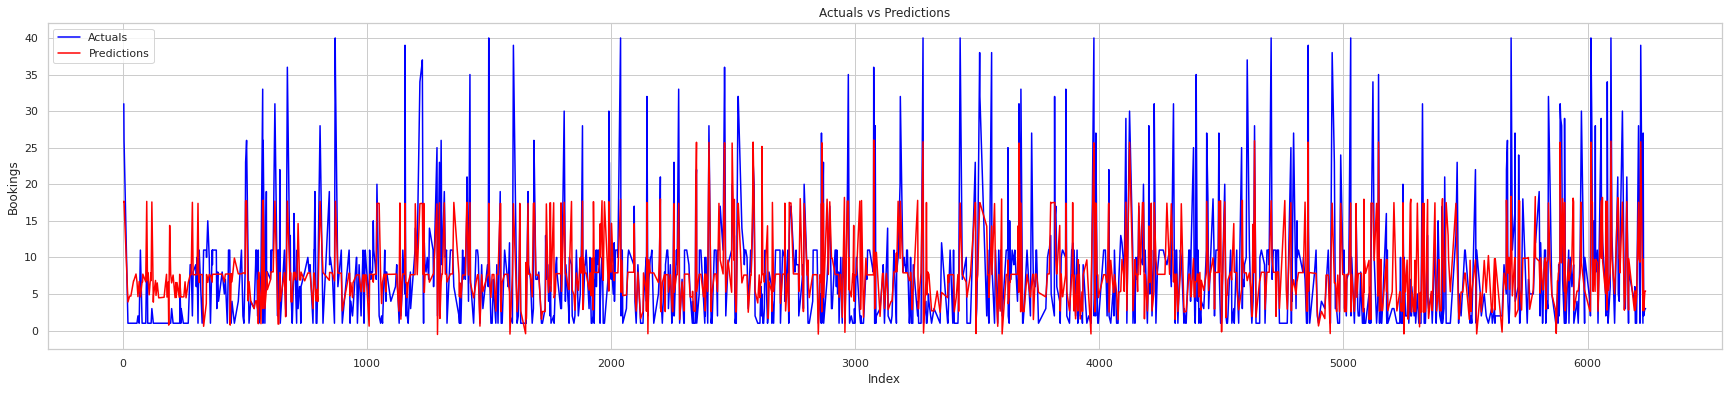

In [158]:
fig, ax=plt.subplots(figsize=(30,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Actuals vs Predictions')
ax.set_ylabel('Bookings')
ax.set_xlabel('Index')

**Observation**
* We can clearly see model is not able to predict properly.

#Linear Regression Assumptions Validation
1. Linearity of the model

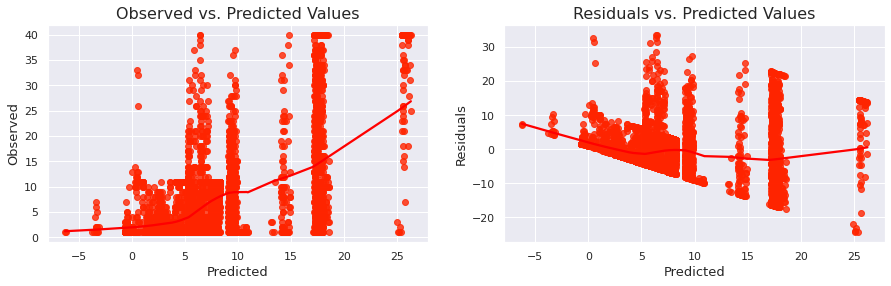

In [159]:
def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
linearity_test(lm_sm, y_train)

2. Homoscedasticity (equal variance) of residuals

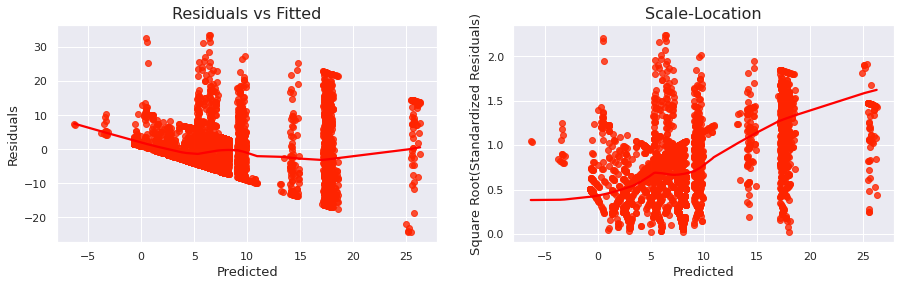

In [160]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(lm_sm)

**Residuals**
Ploting a histogram of the residuals and making sure it looks normally distributed.

Text(0.5, 1.0, 'Q-Q plot')

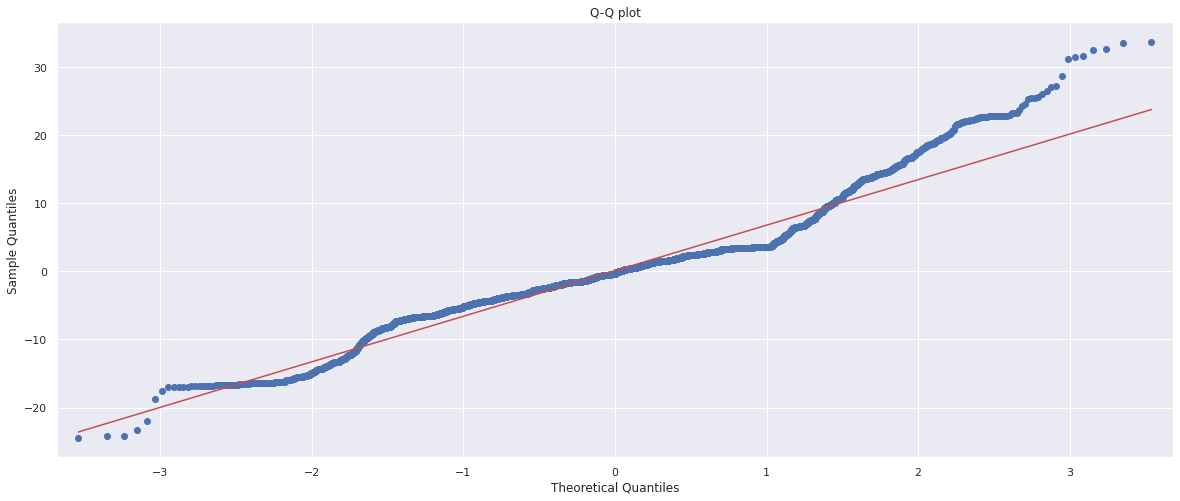

In [161]:
sm.ProbPlot(lm_sm.resid).qqplot(line='s')
plt.title('Q-Q plot')

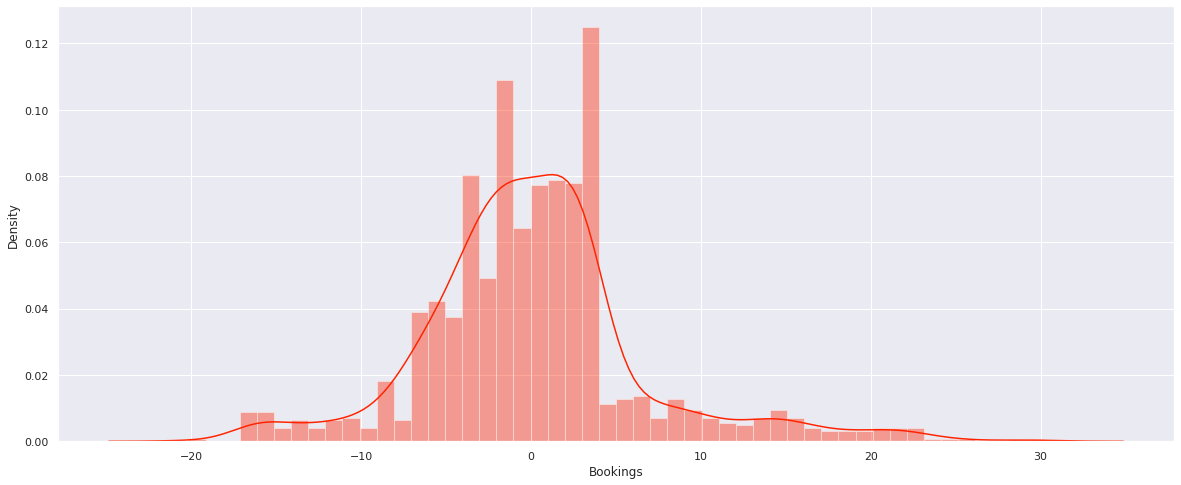

In [162]:
sns.distplot((y_test-test_pred),bins=50);

#SVM

In [163]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=10, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-svm_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("\n____________________________________________")
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-svm_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 3.925202279985708
MSE: 42.258000940463205
RMSE: 6.500615427823985
R2 Square 0.4050792481723843
__________________________________
Adjusted R2:- 0.39832426802186793

____________________________________________
Train set evaluation:
_____________________________________
MAE: 3.998989191619578
MSE: 42.70093542038629
RMSE: 6.534595275943743
R2 Square 0.3848394655790536
__________________________________
Adjusted R2:- 0.3831076643560708


#Decision Treee Regressor

In [164]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(random_state = 0,max_depth=50,max_leaf_nodes=50)
DT_model.fit(X_train,y_train)

test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-DT_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-DT_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.262678512986627
MSE: 40.84528536909
RMSE: 6.391031635744733
R2 Square 0.42496787970098004
__________________________________
Adjusted R2:- 0.4184387234283229
Train set evaluation:
_____________________________________
MAE: 4.231121587348331
MSE: 39.001265997178564
RMSE: 6.245099358471293
R2 Square 0.4381378441076593
__________________________________
Adjusted R2:- 0.43655608859137285


#Random Forest

In [165]:
from sklearn.ensemble import RandomForestRegressor
RDM_forest = RandomForestRegressor(n_estimators =1000)
RDM_forest.fit(X_train, y_train)
test_pred = RDM_forest.predict(X_test)
train_pred = RDM_forest.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-RDM_forest.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-RDM_forest.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.256703145546252
MSE: 42.35800957852684
RMSE: 6.508303125894401
R2 Square 0.40367129671178636
__________________________________
Adjusted R2:- 0.3969003300888869
Train set evaluation:
_____________________________________
MAE: 4.109856714140955
MSE: 37.56782167385654
RMSE: 6.129259471898424
R2 Square 0.4587884075512053
__________________________________
Adjusted R2:- 0.45726478754431144


**Random Forest with HyperParameter Parameter tuning.**

In [166]:
#Parameter
n_estimators = [500] # number of trees in the random forest
max_features = [0.4,0.5,0.6,0.7,0.8,0.9,1] 
# number of features in consideration at every split
max_samples = [0.4,0.5,0.6,0.7,0.8,0.9,1]
max_depth = [50,70,90,110] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1,2,3,4,5,6, 7,8,9,10,11,12,13,14,15]
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

# 'min_samples_s': min_samples_,

'min_samples_leaf': min_samples_leaf,
"max_samples" : max_samples,

'bootstrap': bootstrap}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator =RDM_forest ,param_distributions = random_grid,
               n_iter = 100, cv = 15, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_)

In [ ]:
RDM_forest_hyper = RandomForestRegressor(n_estimators = 1000, min_samples_leaf = 13,max_samples=0.5, max_features = 0.6, max_depth= 50, bootstrap=True) 
RDM_forest_hyper.fit( X_train, y_train) 

test_pred = RDM_forest_hyper.predict(X_test)
train_pred = RDM_forest_hyper.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_hyper.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_hyper.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


#XGB

In [ ]:
import xgboost as xgb
XGB= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
XGB.fit(X_train, y_train)
train_pred=XGB.predict(X_train)
test_pred = XGB.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-XGB.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-XGB.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

  

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)          

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X_train, y_train)

In [ ]:
reg_gs.best_estimator_.get_params()

In [ ]:
XGB_optimal_model =reg_gs.best_estimator_

XGB_optimal_model.fit(X_train, y_train)
train_pred=XGB_optimal_model.predict(X_train)
test_pred = XGB_optimal_model.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print("Adjusted R2:-",1 - (1-XGB_optimal_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
print("Adjusted R2:-",1 - (1-XGB_optimal_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

  